In [1]:
import csv
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as plcolor

In [2]:
def my_layout(G, scale=100):
    layout = {}
    for node in G.nodes():
        layout[node] = [G.nodes[node]['x'] / scale, G.nodes[node]['y'] / scale]
    return layout

In [3]:
cdict = {
    'red'   : [[0.0, 0.0, 0.0],
               [1.0, 0.0, 0.0]],
    'green' : [[0.0, 0.0, 0.0],
               [1.0, 0.0, 0.0]],
    'blue'  : [[0.0, 0.0, 0.0],
               [1.0, 0.0, 0.0]],
    'alpha' : [[0.0, 0.0, 0.0],
               [1.0, 1.0, 1.0]]
}
black_alpha = plcolor.LinearSegmentedColormap('black_alpha', cdict)

In [7]:
def gen_graph_match(match_num, team_name):
    G = nx.DiGraph()
    with open('2020_Problem_D_DATA/weight.csv') as f:
        f_csv = csv.DictReader(f)
        for row in f_csv:
            if int(row['MatchID']) is int(match_num) and team_name in row['OriginID'] and team_name in row['DestinationID']:
                if G.has_edge(row['OriginID'], row['DestinationID']):
                    G[row['OriginID']][row['DestinationID']]['weight'] += int(row['Weight'])
                else:
                    G.add_edge(row['OriginID'], row['DestinationID'], weight=int(row['Weight']))

    with open('2020_Problem_D_DATA/location.csv') as f:
        f_csv = csv.DictReader(f)
        for row in f_csv:
            if row['OriginPlayerID'] in G.nodes() and int(row['MatchID']) is int(match_num):
                G.nodes[row['OriginPlayerID']]['x'] = float(row['EventOrigin_x'])
                G.nodes[row['OriginPlayerID']]['y'] = float(row['EventOrigin_y'])
    for u, v in G.edges():
        G[u][v]['distance'] = 1 / G[u][v]['weight']
    return G

In [10]:
team_list = [('1','Huskies', 2), ('1','Opponent1',3),('2','Huskies',5),('2','Opponent2',6),('3','Huskies',8),('3','Opponent3',9)]

for match_num, team_name, p in team_list:
    G = gen_graph_match(match_num, team_name)
    weights = [G[u][v]['weight'] / 3 for u,v in G.edges()]
    colors = [G[u][v]['weight'] / 18 for u,v in G.edges()]
    colors_node = [nx.clustering(G, weight='weight')[n] for n in G.nodes()]
    labels = nx.clustering(G)
    sizes = [int(nx.closeness_centrality(G, distance='distance', wf_improved=True)[n] * 100) for n in G.nodes()]
    pos = my_layout(G)

    plt.plot()
    nodes_plot = nx.draw_networkx_nodes(G, pos = pos, node_size = sizes, cmap=plt.cm.Wistia, node_color=colors_node, vmin=0, vmax=0.3)
    edges_plot = nx.draw_networkx_edges(G, pos = pos, width = weights, connectionstyle = 'arc3,rad=0.3', edge_color=colors, edge_cmap=black_alpha)
    #labels_plot = nx.draw_networkx_labels(G, pos = my_layout(G), labels = labels, font_color = 'b', font_size = 10)
    #plt.colorbar(plt.cm.ScalarMappable(norm = plcolor.Normalize(0,1), cmap = black_alpha))
    #plt.colorbar(nodes_plot)
    plt.savefig('fig/{0}_{1}.png'.format(team_name, match_num), dpi = 700)
    plt.clf()

<Figure size 432x288 with 0 Axes>

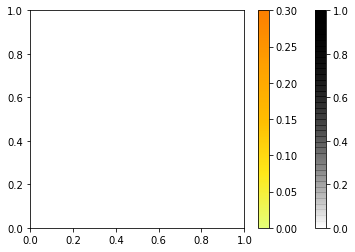

In [11]:
plt.colorbar(plt.cm.ScalarMappable(norm = plcolor.Normalize(0,1), cmap = black_alpha))
plt.colorbar(plt.cm.ScalarMappable(norm = plcolor.Normalize(0,0.3), cmap = plt.cm.Wistia))